# Домашняя работа №1

**Срок сдачи:** 30 сентября 2016, 23:59 <br\>

При отправлении ДЗ на почту указывайте фамилию в названии файла, а тему письма оформляйте в следующем формате: <br\>
** [ИАД] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Table of Contents
 <p><div class="lev1 toc-item"><a data-toc-modified-id="Домашняя-работа-№1-1" href="#Домашняя-работа-№1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Домашняя работа №1</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Регрессия-с-SVM-(3-балла)-2" href="#Регрессия-с-SVM-(3-балла)"><span class="toc-item-num">2&nbsp;&nbsp;</span>Регрессия с SVM (3 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Визуализация-данных-(1-балл)-2.1" href="#Визуализация-данных-(1-балл)"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Визуализация данных (1 балл)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Обучение-моделей-(2-балла)-2.2" href="#Обучение-моделей-(2-балла)"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение моделей (2 балла)</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Определение-языка-слова-(7-баллов)-3" href="#Определение-языка-слова-(7-баллов)"><span class="toc-item-num">3&nbsp;&nbsp;</span>Определение языка слова (7 баллов)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Загрузка-(1-балл)-3.1" href="#Загрузка-(1-балл)"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Загрузка (1 балл)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Подготовка-данных-(2-балла)-3.2" href="#Подготовка-данных-(2-балла)"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка данных (2 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Расчет-ядра-(3-балла)-3.3" href="#Расчет-ядра-(3-балла)"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Расчет ядра (3 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Оценка-качества-(1-балл)-3.4" href="#Оценка-качества-(1-балл)"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Оценка качества (1 балл)</a></div>

# Регрессия с SVM (3 балла)

SVM можно использовать и для задачи регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных и выведите их на графике.

In [1]:
# importing required libs
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_frame = pd.read_csv("titanium.csv")
data_frame.describe()

,x,y
count,49.000000,49.000000
mean,825.000000,0.804592
std,142.886902,0.375022
min,585.000000,0.601000
25%,705.000000,0.627000
50%,825.000000,0.663000
75%,945.000000,0.730000
max,1065.000000,2.169000


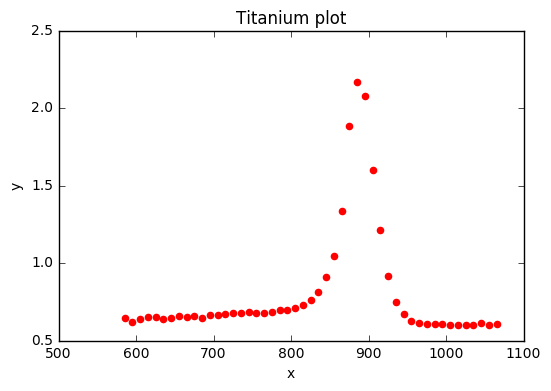

In [3]:
plt.scatter(data_frame["x"], data_frame["y"], color='r')
plt.title("Titanium plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Обучение моделей (2 балла)

Рассмотрим 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установите точность алгоритма оптимизации `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наилучшего параметра $C$ постройте график с данными и предсказанием с помощью SVM.

В каких случаях возникают эффекты недообучения, переобучения?

In [4]:
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import numpy as np
%matplotlib inline

In [5]:
X_values = data_frame.x.values.reshape(-1, 1)
scaler = StandardScaler().fit(X_values)
X_values = scaler.transform(X_values)
y_values = data_frame.y.values

In [6]:
def calcErorsAndPlots(kernel, degree=3, gamma="auto", coef0=0.0, color1="b", color2="g",epsilon=0.01):
    c_logspace = np.logspace(-1, 2, 10)
    error_list = []
    for c in c_logspace:
        svm = SVR(kernel=kernel, C=c, degree=degree, gamma=gamma, epsilon=epsilon, coef0=coef0)
        y_predicted = svm.fit(X_values, y_values).predict(X_values)
        mean_abs_error = mean_absolute_error(y_values, y_predicted)
        error_list.append(mean_abs_error)
            
    print("Plots for {} kernel".format(kernel))
    
    # err plt
    plt.plot(c_logspace, error_list, c=color1)
    plt.figsize=(10, 4)
    plt.title("Error plot")
    plt.xscale("log")
    plt.xlabel("C")
    plt.ylabel("Error")
    plt.grid(True)
    plt.show()
    
    # best C plot
    idx = np.argmin(error_list)
    svm = SVR(kernel=kernel, C=c_logspace[idx], degree=degree, gamma=gamma, epsilon=epsilon, coef0=coef0)
    svm.fit(X_values, y_values)
    
    y_prediction = svm.predict(X_values)
    
    plt.title("Plot for {} kernel".format(kernel))
    plt.figsize=(10, 4)
    plt.xlabel("X values")
    plt.ylabel("y predicted")
    plt.scatter(X_values, y_values, c=color1)
    plt.plot(X_values, y_prediction, c=color2)
    plt.show()

Plots for linear kernel


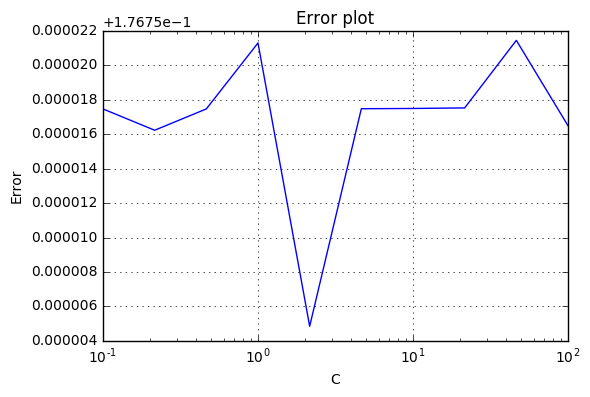

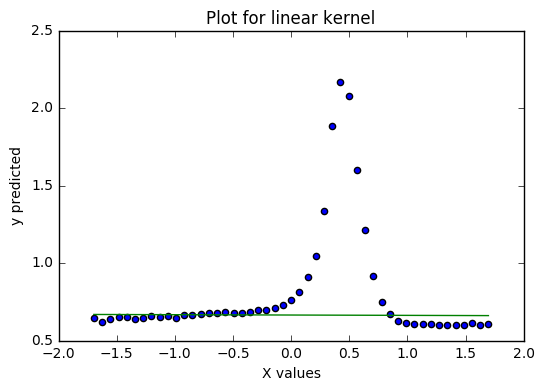

Plots for poly kernel


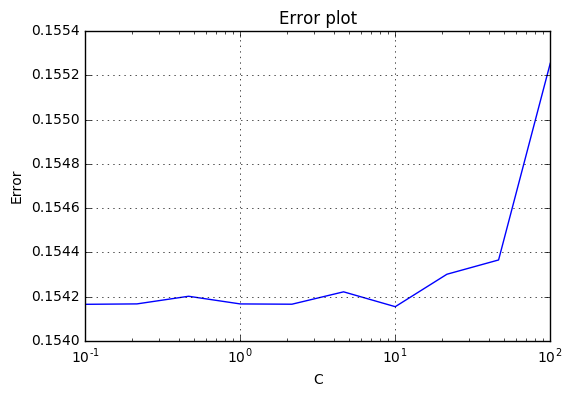

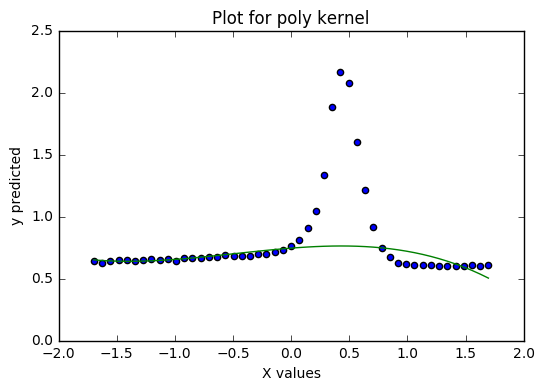

Plots for rbf kernel


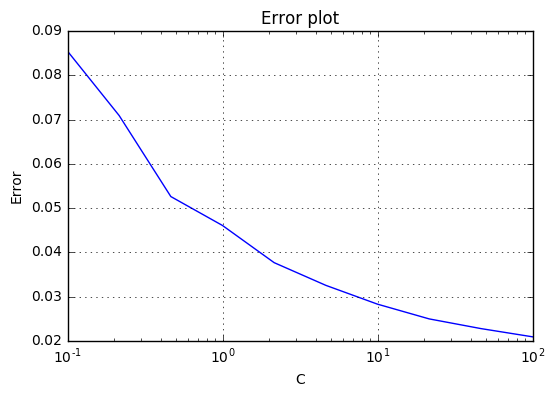

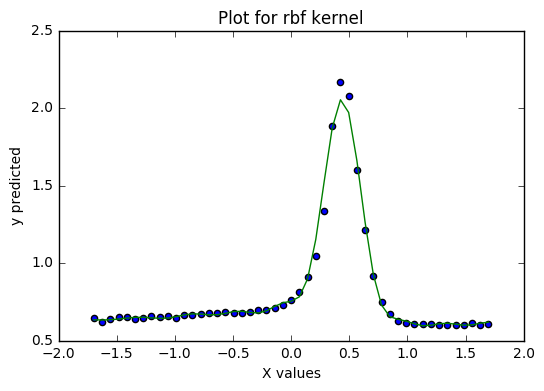

In [7]:
calcErorsAndPlots("linear")
calcErorsAndPlots("poly", gamma=6, coef0=1)
calcErorsAndPlots("rbf", gamma=6, coef0=1)

Ответ: Недообучение возникает в случае использования линейного и полиноминального ядер. 

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Даны два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова.

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [8]:
def readWAPfile(name, label):
    wap_file = pd.read_csv(name, header=-1)
    wap_file.columns=["word"]
    wap_file["label"] = label
    return wap_file

In [9]:
wap_es = readWAPfile("war_and_peace_es.txt", 0)
print("wap_es shape: {}".format(wap_es.shape))
wap_en = readWAPfile("war_and_peace_en.txt", 1)
print("wap_en shape: {}".format(wap_en.shape))
wap = pd.concat([wap_es, wap_en], axis=0)
print("total wap shape: {}".format(wap.shape))

wap_es shape: (6359, 2)
wap_en shape: (5044, 2)
total wap shape: (11403, 2)


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [10]:
from sklearn.cross_validation import train_test_split

In [11]:
RND_SEED = 49853
df_part = wap.sample(n=1000, random_state=RND_SEED).reset_index(drop=True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_part.index.values, df_part.label.values, test_size=0.4, random_state=42)

## Расчет ядра (3 балла)

Теперь напишем собственное ядро для классификации строк. Для сравнения строк будем использовать [расстояние Левенштейна](https://ru.wikipedia.org/wiki/Расстояние_Левенштейна). Реализацию этого расстояния можно получить одним из двух способов:
* скопировать функцию wfi_levenshtein из файла [pylev.py](https://github.com/toastdriven/pylev/blob/master/pylev.py)
* поставить пакет [editdistance](https://pypi.python.org/pypi/editdistance) (будет работать быстрее, чем предыдущая реализация, но могут возникнуть проблемы с установкой)

Ядро для сравнения строк должно принимать максимальное значение, когда слова одинаковы, и минимальное, когда очень отличаются. Это противоположно свойствам расстояния Левенштейна: оно равно 0, когда слова одинаковы, и максимально, когда слова разные. Поэтому подставьте значение расстояния Левенштейна в какое-нибудь ядро, зависящее от расстояния между объектами (например, гауссовское).

Функция, реализующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во время обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).
Функция должна возвращать матрицу значений ядра для всех объектов попарно: $G_{ij} = K(U_i, V_j)$. Здесь $U_i$ — i-ый объект выборки $U$, а $V_j$ — j-ый объект выборки $V$.

Сделайте следующее:
1. Напишите функцию *string_kernel(U, V)*, расчитывающую матрицу ядра $G_{ij}$
2. Визуализируйте матрицу только для тренировочной выборки (функция plt.imshow()).


In [13]:
import editdistance as ed
import numpy as np

In [14]:
def string_kernel(U, V):
    G = np.empty([len(U), len(V)])
    for i in range(len(U)):
        for j in range(len(V)):
            G[i, j] = np.exp(-ed.eval(df_part.loc[U[i], 'word'], df_part.loc[V[j], 'word']))
    return G

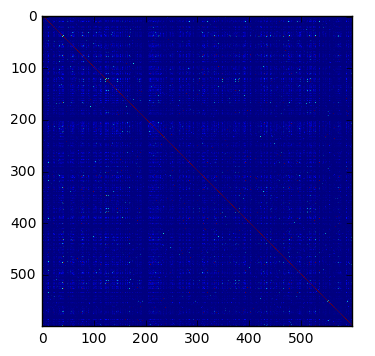

In [15]:
G = string_kernel(X_train, X_train)
plt.imshow(G)

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке. Для улучшения качества можно увеличить размер тренировочной выборки. Но тогда обучение будет происходить дольше.

In [21]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

In [22]:
clf = SVC(kernel="precomputed")
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
grid_search = GridSearchCV(clf, param_grid, n_jobs = -1)

In [24]:
grid_search.fit(string_kernel(X_train, X_train), y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel='precomputed', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)